<h1 style = "text-align: center">Previsão da Lentidão no Tráfego Urbano em São Paulo</h1>


**Descrição do Problema e Objetivo do Projeto:**

Este projeto tem como objetivo desenvolver um modelo de previsão para a lentidão no tráfego urbano na cidade de São Paulo, com base em dados coletados durante o período de 14 a 18 de dezembro de 2009, de segunda a sexta-feira, das 7:00 às 20:00, a cada 30 minutos. O conjunto de dados "Behavior of the urban traffic of the city of Sao Paulo in Brazil" foi utilizado como fonte de informações para essa análise.

O problema a ser resolvido está relacionado à necessidade de entender e prever os níveis de lentidão no tráfego urbano em São Paulo, considerando diversas variáveis, como a presença de ônibus imobilizados, caminhões quebrados, excesso de veículos, vítimas de acidentes, atropelamentos, presença de veículos de bombeiros, ocorrências envolvendo carga, incidentes com carga perigosa, falta de eletricidade, incêndios, pontos de inundação, manifestações, defeitos na rede de trolebus, árvores na pista, semáforos desligados e semáforos intermitentes.

Com base nas informações históricas dessas variáveis, nosso objetivo é criar um modelo de previsão que possa antecipar a lentidão no tráfego urbano em São Paulo em determinados horários e condições. Isso pode ser extremamente útil para órgãos de tráfego, motoristas e planejadores urbanos, permitindo a tomada de decisões mais informadas para mitigar a lentidão e melhorar o fluxo de tráfego na cidade.

Nossos esforços se concentrarão na análise exploratória dos dados, engenharia de recursos, treinamento de modelos de aprendizado de máquina e avaliação da precisão das previsões. Esperamos que este projeto ajude a contribuir para soluções mais eficazes no gerenciamento do tráfego urbano em São Paulo, tornando a cidade mais acessível e eficiente para seus habitantes.

**Fonte**: https://archive.ics.uci.edu/ml/datasets/Behavior+of+the+urban+traffic+of+the+city+of+Sao+Paulo+in+Brazil#

## Por que esse dataset?

O dataset "Behavior of the urban traffic of the city of Sao Paulo in Brazil" foi escolhido para este projeto por várias razões fundamentais. Primeiramente, ele oferece uma visão abrangente e rica do comportamento do tráfego urbano em uma das maiores cidades do Brasil, São Paulo. Com registros detalhados das condições de tráfego ao longo de uma semana típica, este conjunto de dados é uma valiosa fonte de informações para compreender os desafios do tráfego urbano em áreas urbanas densamente povoadas.

Além disso, o conjunto de dados é especialmente versátil, pois pode ser aplicado tanto a problemas de classificação quanto a problemas de regressão. Isso significa que podemos usar esses dados não apenas para prever a ocorrência de eventos específicos, como acidentes ou problemas com semáforos (classificação), mas também para prever continuamente a lentidão no tráfego, que é uma medida numérica contínua (regressão).

A capacidade de aplicar técnicas de classificação e regressão abre um leque de oportunidades para soluções práticas. Por exemplo, podemos desenvolver modelos de classificação para identificar os fatores que mais contribuem para a lentidão no tráfego, como acidentes ou congestionamentos causados por excesso de veículos. Por outro lado, podemos criar modelos de regressão para prever a porcentagem de lentidão no tráfego em um horário e local específicos, fornecendo informações valiosas para a gestão do tráfego e para os motoristas que desejam planejar suas rotas com antecedência.

Em resumo, a escolha deste dataset se deve à sua riqueza de informações sobre o tráfego urbano em São Paulo e à sua versatilidade em aplicação, possibilitando a exploração de problemas de classificação e regressão para melhorar a compreensão e a gestão do tráfego na cidade.

### Colaboradores


- 	LUAN VEIGA SAMPAIO FEO

- 	LUCAS HENRIK JESUS SILVA

- 	LUCAS ROTH DA SILVA

- 	MATHEUS DE VERAS LINO

- 	PABLO DANTAS EVANGELISTA DOS SANTOS

- 	THIAGO DO SANTOS RODACKI


### Leitura de dados com pandas

In [1]:
# Importando os pacotes que serão necessarios para fazer a etapa de análise exploratória 
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import squarify
%matplotlib inline
sns.set_palette('winter_r')

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('behavior_of_the_urban_traffic.csv', sep = ';', decimal = ',')
df.head()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1


Os números correspondem ao número de ocorrências que um tipo de acidente específico ocorreu em um determinado intervalo de tempo.

In [3]:
# Vendo se há algum valor ausente no conjunto de dados
df.isnull().sum()

Hour (Coded)                             0
Immobilized bus                          0
Broken Truck                             0
Vehicle excess                           0
Accident victim                          0
Running over                             0
Fire vehicles                            0
Occurrence involving freight             0
Incident involving dangerous freight     0
Lack of electricity                      0
Fire                                     0
Point of flooding                        0
Manifestations                           0
Defect in the network of trolleybuses    0
Tree on the road                         0
Semaphore off                            0
Intermittent Semaphore                   0
Slowness in traffic (%)                  0
dtype: int64

In [4]:
# Vendo algumas estatisticas
df.describe()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
count,135.00000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,14.00000,0.340741,0.874074,0.029630,0.422222,0.118519,0.007407,0.007407,0.007407,0.118519,0.007407,0.118519,0.051852,0.229630,0.044444,0.125926,0.014815,10.051852
std,7.81789,0.659749,1.102437,0.170195,0.696116,0.346665,0.086066,0.086066,0.086066,0.504485,0.086066,0.712907,0.222554,0.818998,0.206848,0.464077,0.121261,4.363243
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.400000
25%,7.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.400000
50%,14.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
75%,21.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.850000
max,27.00000,4.000000,5.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,7.000000,1.000000,8.000000,1.000000,4.000000,1.000000,23.400000


### Manipulação e limpeza de dados com pandas

No Manual de Comunicação informa que: 
 - A manhã, é das 6h às 12h (ou ao meio-dia).
 - A tarde, é das 12h às 18h.
 - A noite, e das 18h às 24h (ou meia-noite)
 
Fonte: https://www12.senado.leg.br/manualdecomunicacao/estilos/hora#:~:text=A%20madrugada%20vai%20da%20zero,(ou%20meia%2Dnoite).


In [5]:
# Como a hora está em numeros, vamos dividi-lo em periodos 
def PeriodoDoDia(num):
    if num < 12:        
        return 'Manha'
    elif num >= 11 and num == 18 :
        return 'Tarde'
    elif num > 18:
        return 'Noite'

A função `PeriodoDoDia` está sendo criada para categorizar o horário do dia em períodos específicos, como "Manhã", "Tarde" e "Noite". Isso é útil para melhor compreender o comportamento do tráfego em diferentes momentos do dia. Além disso, a função considera que os registros são feitos a cada 30 minutos, o que permite uma categorização mais precisa das horas em que ocorrem os eventos de tráfego no conjunto de dados.

In [6]:
# Criando as classes
df['PeriodoDoDia'] = df['Hour (Coded)'].map(PeriodoDoDia)
df['PeriodoDoDia'].tail()

130    Noite
131    Noite
132    Noite
133    Noite
134    Noite
Name: PeriodoDoDia, dtype: object

In [7]:
# Substituindo os números pela hora correspondente 

df.loc[df['Hour (Coded)'] == 1,'Hour (Coded)']='7:00'
df.loc[df['Hour (Coded)'] == 2,'Hour (Coded)']='7:30'
df.loc[df['Hour (Coded)'] == 3,'Hour (Coded)']='8:00'
df.loc[df['Hour (Coded)'] == 4,'Hour (Coded)']='8:30'
df.loc[df['Hour (Coded)'] == 5,'Hour (Coded)']='9:00'
df.loc[df['Hour (Coded)'] == 6,'Hour (Coded)']='9:30'
df.loc[df['Hour (Coded)'] == 7,'Hour (Coded)']='10:00'
df.loc[df['Hour (Coded)'] == 8,'Hour (Coded)']='10:30'
df.loc[df['Hour (Coded)'] == 9,'Hour (Coded)']='11:00'
df.loc[df['Hour (Coded)'] == 10,'Hour (Coded)']='11:30'
df.loc[df['Hour (Coded)'] == 11,'Hour (Coded)']='12:00'
df.loc[df['Hour (Coded)'] == 12,'Hour (Coded)']='12:30'
df.loc[df['Hour (Coded)'] == 13,'Hour (Coded)']='13:00'
df.loc[df['Hour (Coded)'] == 14,'Hour (Coded)']='13:30'
df.loc[df['Hour (Coded)'] == 15,'Hour (Coded)']='14:00'
df.loc[df['Hour (Coded)'] == 16,'Hour (Coded)']='14:30'
df.loc[df['Hour (Coded)'] == 17,'Hour (Coded)']='15:00'
df.loc[df['Hour (Coded)'] == 18,'Hour (Coded)']='15:30'
df.loc[df['Hour (Coded)'] == 19,'Hour (Coded)']='16:00'
df.loc[df['Hour (Coded)'] == 20,'Hour (Coded)']='16:30'
df.loc[df['Hour (Coded)'] == 21,'Hour (Coded)']='17:00'
df.loc[df['Hour (Coded)'] == 22,'Hour (Coded)']='17:30'
df.loc[df['Hour (Coded)'] == 23,'Hour (Coded)']='18:00'
df.loc[df['Hour (Coded)'] == 24,'Hour (Coded)']='18:30'
df.loc[df['Hour (Coded)'] == 25,'Hour (Coded)']='19:00'
df.loc[df['Hour (Coded)'] == 26,'Hour (Coded)']='19:30'
df.loc[df['Hour (Coded)'] == 27,'Hour (Coded)']='20:00'

In [8]:
# Dicionário de mapeamento de código para hora
codigo_para_hora = {
    1: '7:00',
    2: '7:30',
    3: '8:00',
    4: '8:30',
    5: '9:00',
    6: '9:30',
    7: '10:00',
    8: '10:30',
    9: '11:00',
    10: '11:30',
    11: '12:00',
    12: '12:30',
    13: '13:00',
    14: '13:30',
    15: '14:00',
    16: '14:30',
    17: '15:00',
    18: '15:30',
    19: '16:00',
    20: '16:30',
    21: '17:00',
    22: '17:30',
    23: '18:00',
    24: '18:30',
    25: '19:00',
    26: '19:30',
    27: '20:00'
}

# Loop para substituir os códigos pelas horas correspondentes
for codigo, hora in codigo_para_hora.items():
    df.loc[df['Hour (Coded)'] == codigo, 'Hour (Coded)'] = hora


In [9]:
# Observando os tipos de dados de cada coluna
df.dtypes

Hour (Coded)                              object
Immobilized bus                            int64
Broken Truck                               int64
Vehicle excess                             int64
Accident victim                            int64
Running over                               int64
Fire vehicles                              int64
Occurrence involving freight               int64
Incident involving dangerous freight       int64
Lack of electricity                        int64
Fire                                       int64
Point of flooding                          int64
Manifestations                             int64
Defect in the network of trolleybuses      int64
Tree on the road                           int64
Semaphore off                              int64
Intermittent Semaphore                     int64
Slowness in traffic (%)                  float64
PeriodoDoDia                              object
dtype: object

In [10]:
# Criando uma função para criar a variável classe que vai conter os labels das classes 

def Class(num):
    if num < 9:        
        return 'Baixo'
    elif num >= 9 and num < 18 :
        return 'Medio'
    elif num >= 18:
        return 'Alto'

In [11]:
# Criando as classes
df['Class'] = df['Slowness in traffic (%)'].map(Class)
df['Class'].tail()

130    Medio
131     Alto
132    Medio
133    Medio
134    Medio
Name: Class, dtype: object

### Descritivo e exploração de dados com pandas (groupbys)

In [12]:
# Usando crosstap para uma melhor visualização
pd.crosstab(df['Class'], df['Hour (Coded)'])

Hour (Coded),10:00,10:30,11:00,11:30,12:00,12:30,13:00,13:30,14:00,14:30,...,18:30,19:00,19:30,20:00,7:00,7:30,8:00,8:30,9:00,9:30
Class,,,,,,,,,,,,,,,,,,,,,
Alto,0,0,0,0,0,0,0,0,0,0,...,3,2,2,2,0,0,0,0,0,0
Baixo,4,4,4,4,4,4,3,3,3,3,...,0,0,0,1,5,5,5,3,3,2
Medio,1,1,1,1,1,1,2,2,2,2,...,2,3,3,2,0,0,0,2,2,3


### Figuras que mostrem insights sobre os dados com pandas e matplotlib

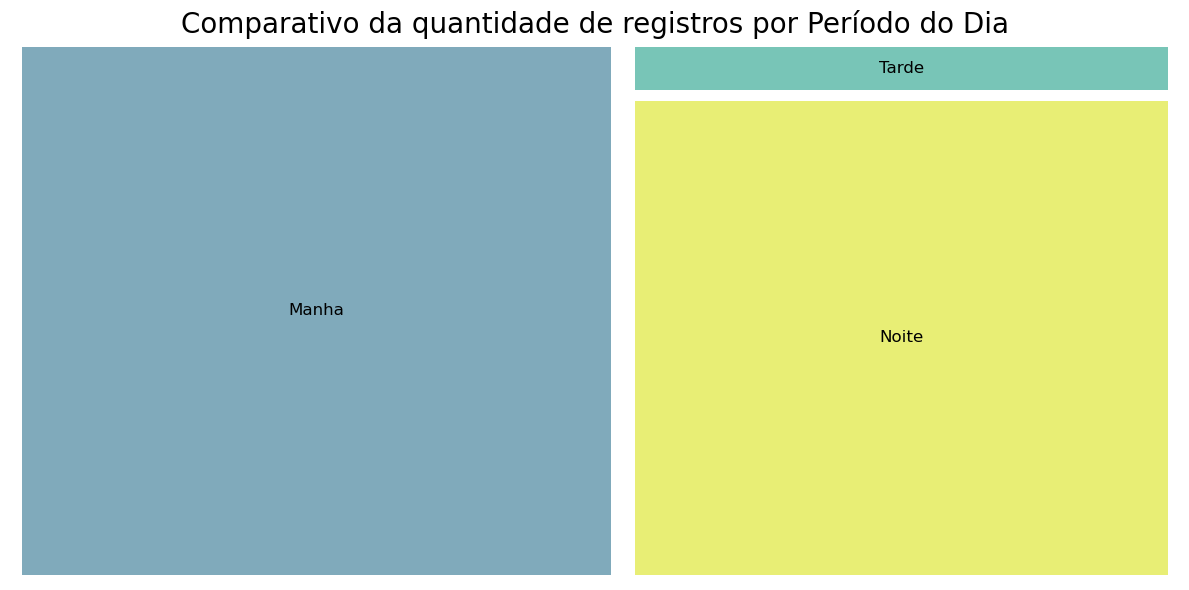

In [13]:
# Definindo o tamanho da figura
plt.figure(figsize=(12,6))

# Fazendo o Treemap
squarify.plot(sizes=df.PeriodoDoDia.value_counts(), label=df.PeriodoDoDia.value_counts().index,
              pad=True, alpha=0.6, text_kwargs={'fontsize': 12});

# Adicionando um título
plt.title('Comparativo da quantidade de registros por Período do Dia', fontsize=20)

# Removendo os eixos
plt.axis('off');

# Ajustando o gráfico
plt.tight_layout()


Com base na análise da distribuição dos períodos do dia no conjunto de dados "Behavior of the urban traffic of the city of Sao Paulo in Brazil", podemos tirar as seguintes conclusões:

1. **Manhã (Morning):** A maior parte dos registros ocorrem pela manhã. Isso sugere que a manhã é um período significativo em que eventos relacionados ao tráfego urbano são registrados. Pode ser interessante explorar quais tipos de eventos são mais comuns durante esse período, como acidentes ou congestionamentos, para entender melhor os desafios de tráfego enfrentados pela cidade de São Paulo nas manhãs.

2. **Noite (Night):** E em segundo lugar na quatidade de registros estão associados ao período da noite. Isso indica que eventos de tráfego também ocorrem com frequência durante a noite. É importante investigar quais tipos de eventos são mais comuns à noite e se existem diferenças significativas em relação à manhã e à tarde.

3. **Tarde (Afternoon):** E por último na quantidade dos registros correspondem ao período da tarde. Isso pode sugerir que eventos de tráfego à tarde são menos frequentes em comparação com os outros períodos. No entanto, é importante observar que a distribuição de eventos pode variar significativamente ao longo dos dias da semana. Portanto, é necessário considerar o contexto semanal ao interpretar essa porcentagem.

Essas conclusões iniciais podem orientar análises mais detalhadas para entender os padrões de tráfego e eventos em diferentes momentos do dia, ajudando a melhorar o planejamento e a gestão do tráfego urbano na cidade de São Paulo.

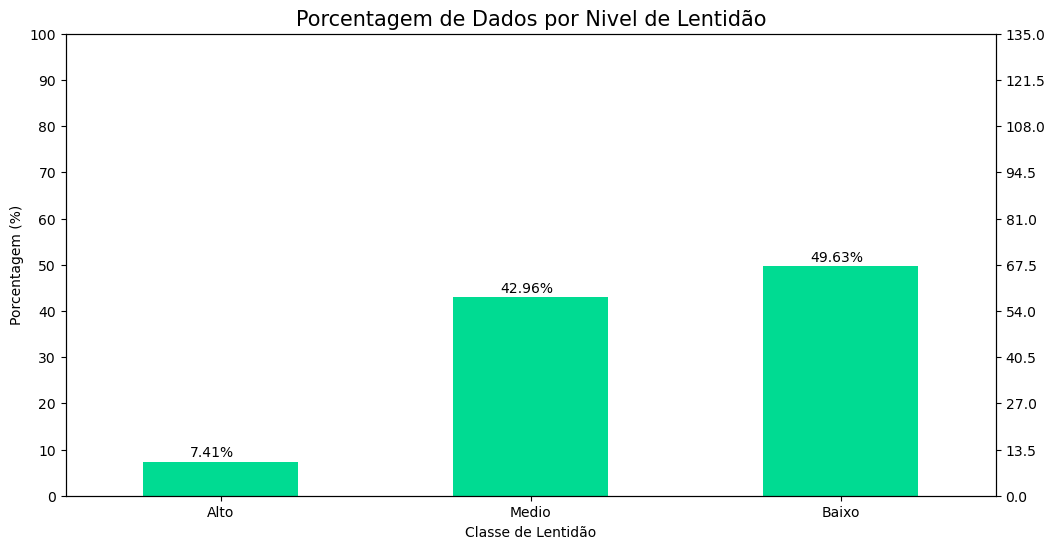

In [14]:
plt.figure(figsize=(12,6))
plt.title('Porcentagem de Dados por Nivel de Lentidão', fontsize = 15)
plt.xlabel('Classe de Lentidão')
plt.ylabel('Porcentagem (%)')

ax = (df.Class.value_counts()/len(df)*100).sort_values().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

Com base na análise da distribuição das classificações de "Slowness in traffic" no conjunto de dados "Behavior of the urban traffic of the city of Sao Paulo in Brazil", podemos tirar as seguintes conclusões:

1. **Baixo (Low):** Cerca de 49.63% dos registros estão classificados como "Baixo" em relação à lentidão no tráfego. Isso sugere que em quase metade dos casos observados, o tráfego apresenta baixa lentidão. Isso pode ser atribuído a uma fluidez relativamente boa do tráfego em São Paulo durante os horários registrados no conjunto de dados.

2. **Médio (Medium):** Aproximadamente 42.96% dos registros têm uma classificação de "Médio" em relação à lentidão no tráfego. Isso indica que a lentidão é moderada em uma parcela significativa dos casos. Pode haver várias razões para essa lentidão moderada, como congestionamentos normais ou incidentes menores de tráfego.

3. **Alto (High):** Cerca de 7.41% dos registros estão classificados como "Alto" em relação à lentidão no tráfego. Isso representa uma porção relativamente pequena do conjunto de dados. No entanto, a lentidão alta ainda é uma preocupação, pois pode indicar congestionamentos graves ou eventos significativos que afetam o fluxo de tráfego na cidade.

No contexto do dataset "Behavior of the urban traffic of the city of Sao Paulo in Brazil", a classificação da lentidão no tráfego é uma métrica importante para entender a eficiência e o desempenho do sistema viário da cidade. Pode haver várias razões para diferentes níveis de lentidão, incluindo acidentes, congestionamentos devido ao excesso de veículos, obras na via, problemas de sinalização, entre outros.

Para justificar os níveis de lentidão, seria necessário realizar uma análise mais aprofundada dos dados, identificando as causas subjacentes dos diferentes níveis de lentidão em diferentes horários e locais. Isso pode incluir a investigação de eventos específicos registrados no conjunto de dados, bem como a consideração de fatores externos, como condições meteorológicas, eventos especiais na cidade e feriados, que podem influenciar o tráfego urbano.

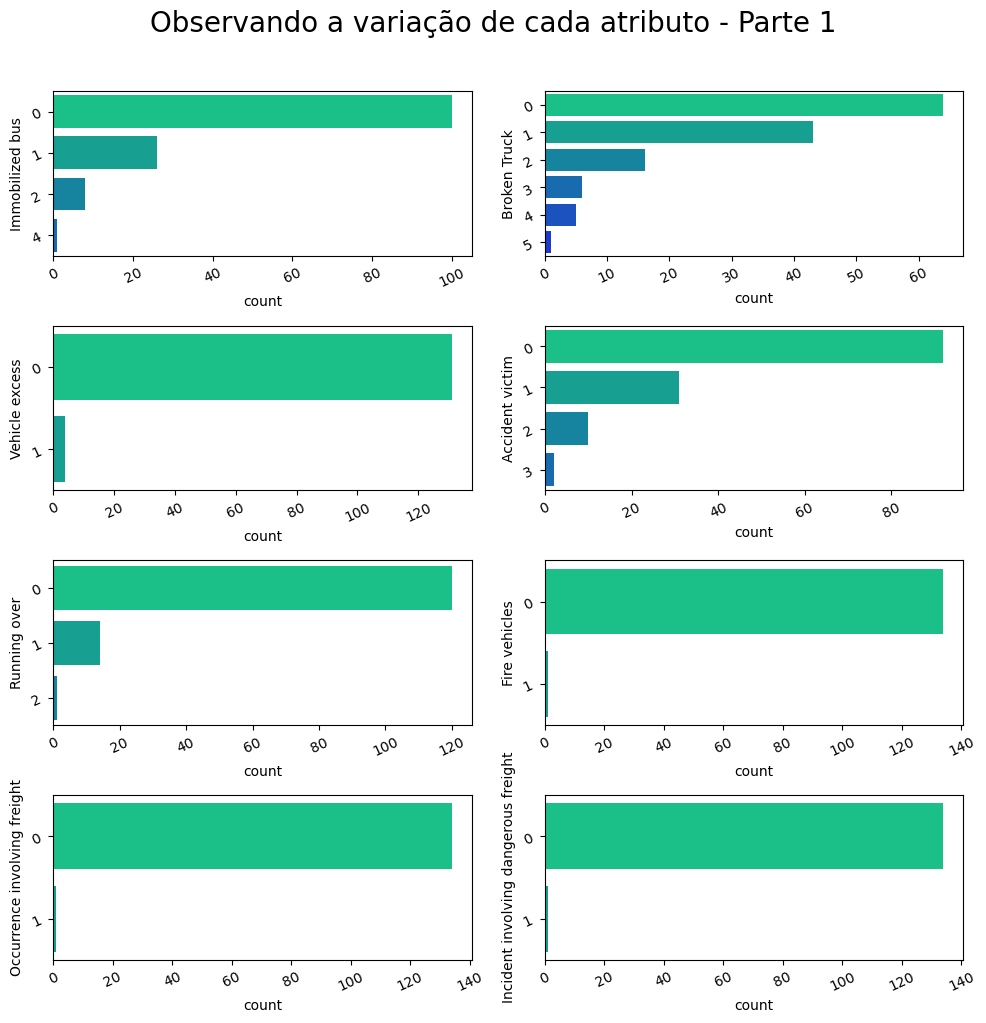

In [15]:
fig,ax =  plt.subplots(4, 2, figsize = (10, 10))
fig.suptitle('Observando a variação de cada atributo - Parte 1',y=1.02, fontsize=20)

ax[0][0].tick_params(labelrotation = 25)  
sns.countplot(y = 'Immobilized bus', 
              data = df, 
              ax = ax[0][0])
  
ax[0][1].tick_params(labelrotation = 25)
sns.countplot(y = 'Broken Truck',  
              data = df,
              ax = ax[0][1])
  
ax[1][0].tick_params(labelrotation = 25)
sns.countplot(y = 'Vehicle excess', 
              data = df,
              ax = ax[1][0])
  

ax[1][1].tick_params(labelrotation = 25) 
sns.countplot(y = 'Accident victim', 
              data = df, 
              ax = ax[1][1])

ax[2][0].tick_params(labelrotation = 25)
sns.countplot(y = 'Running over', 
              data = df, 
              ax = ax[2][0])

ax[2][1].tick_params(labelrotation = 25)
sns.countplot(y = 'Fire vehicles',  
              data = df, 
              ax = ax[2][1])

ax[3][0].tick_params(labelrotation = 25)
sns.countplot(y = 'Occurrence involving freight', 
              data = df, 
              ax = ax[3][0])
  
ax[3][1].tick_params(labelrotation = 25)
sns.countplot(y = 'Incident involving dangerous freight', 
              data = df,
              ax = ax[3][1])
  
fig.tight_layout(pad = 1.2)
plt.show()


**About Immobilized bus**:


O fato de haver registros com dois ou mais ônibus imobilizados sugere situações de tráfego excepcionais que podem causar lentidão significativa e impactar negativamente o fluxo de veículos na cidade

 **About Broken Truck**:

A presença de caminhões quebrados é relativamente comum, indicando pelo menos um caminhão com problemas.

Quando há a ocorrência de dois ou mais caminhões quebrados (valores 2 a 5), isso pode indicar situações potencialmente problemáticas para o tráfego. A presença de múltiplos caminhões quebrados pode causar bloqueios significativos nas vias e aumentar a lentidão do tráfego.

Portanto, um alerta pode ser acionado quando dois ou mais caminhões estão quebrados ao mesmo tempo. Isso poderia ser usado para priorizar ações de resposta rápida ou para informar os motoristas sobre possíveis obstáculos à frente, ajudando a reduzir a probabilidade de congestionamentos graves.

 **About Vehicle excess**:

Os casos em que há excesso de veículos são menos comuns, mas ainda representam uma parte do conjunto de dados. Essa informação pode ser útil para identificar áreas ou momentos específicos em que o congestionamento de veículos é mais frequente e, possivelmente, tomar medidas para aliviar essa condição.

 **About Accident victim**:

A presença de vítimas de acidentes pode causar congestionamento e lentidão no tráfego por várias razões:

- Intervenção de emergência: Quando ocorre um acidente com vítimas, é necessário acionar os serviços de emergência, como ambulâncias e equipes de resgate. Isso pode levar à interrupção temporária da via ou à redução da velocidade do tráfego para permitir a assistência às vítimas.

- Curiosidade dos motoristas: A presença de acidentes muitas vezes atrai a atenção dos outros motoristas, levando à desaceleração do tráfego devido à curiosidade ou ao desejo de observar o que aconteceu.

- Bloqueio de vias: Acidentes graves podem causar bloqueio parcial ou total de vias, exigindo desvios e redirecionamento do tráfego, o que contribui para a lentidão.

- Investigação e documentação: A polícia e outras autoridades podem precisar investigar e documentar acidentes com vítimas, o que pode ocupar o local e causar lentidão no tráfego.

Portanto, a presença de vítimas de acidentes pode ter um impacto significativo na fluidez do tráfego e pode contribuir para o congestionamento, especialmente em casos de acidentes graves. É importante que as autoridades de trânsito e de segurança rodoviária respondam rapidamente a essas situações para minimizar o impacto no tráfego e garantir a segurança das vítimas e dos demais motoristas.

 **About Running over**:

A gestão de acidentes com atropelamentos requer uma abordagem coordenada para garantir a segurança das vítimas e minimizar o impacto no congestionamento. A prioridade deve ser sempre a assistência às vítimas, mas também é importante tomar medidas para manter o tráfego fluindo de forma segura ao redor do local do acidente.

 **About Fire vehicles**:

Quando se trata de registros relacionados a "Fire vehicles" (veículos de combate a incêndio) no conjunto de dados, a presença de veículos de combate a incêndio geralmente indica a ocorrência de incêndios ou situações de emergência que exigem resposta imediata das autoridades de combate a incêndios. Nesse contexto, os cuidados em relação ao congestionamento podem ser os seguintes:

1. **Prioridade à Emergência:** A prioridade máxima é garantir que os veículos de combate a incêndio possam chegar ao local da emergência o mais rápido possível. Motoristas devem estar cientes da presença desses veículos e permitir que eles passem sem obstruções. É essencial dar passagem aos veículos de emergência para que possam chegar ao destino rapidamente e lidar com a situação de incêndio.

2. **Isolamento da Área:** Quando há um incêndio em andamento, é importante isolar a área afetada para proteger a segurança pública. Isso pode envolver o fechamento temporário de vias ou desvios de tráfego. O isolamento da área afetada ajuda a manter os motoristas fora de perigo e permite que os bombeiros operem com eficácia.

3. **Coordenação de Tráfego:** As autoridades de trânsito devem coordenar o tráfego nas proximidades do local do incêndio para evitar congestionamentos desnecessários. Isso pode envolver a implementação de rotas alternativas e a orientação dos motoristas para evitar a área afetada.

4. **Comunicação com o Público:** Manter o público informado sobre a situação é importante para evitar confusões e frustração entre os motoristas. Painéis eletrônicos de trânsito, aplicativos de navegação e mídias sociais podem ser usados para fornecer informações atualizadas sobre o tráfego e a situação do incêndio.

5. **Investigação e Limpeza Rápida:** Após o combate ao incêndio, é importante realizar uma investigação adequada e completa para determinar a causa do incêndio. A remoção de destroços e a limpeza do local devem ser realizadas rapidamente para permitir a retomada do tráfego normal.

Em resumo, quando há a presença de veículos de combate a incêndio, a segurança e a resposta eficiente à emergência devem ser as principais preocupações. A gestão do tráfego deve ser coordenada para permitir que os veículos de combate a incêndio cheguem ao local e lidem com a situação de forma eficaz, minimizando ao máximo o congestionamento e garantindo a segurança de todos os envolvidos.


 **About Occurrence involving freight**:

Quando analisamos a distribuição dos registros relacionados a "Occurrence involving freight" (ocorrência envolvendo carga) e observamos que cerca de 99.26% dos registros apresentam o valor 0, indicando que não houve ocorrência envolvendo carga, e apenas 0.74% dos registros apresentam o valor 1, indicando que houve alguma ocorrência envolvendo carga, podemos tirar as seguintes conclusões:

1. **Baixa Incidência de Ocorrências Envolvendo Carga:** A partir desses resultados, podemos concluir que o conjunto de dados possui uma baixa incidência de ocorrências envolvendo carga. A grande maioria dos registros não relata problemas relacionados ao transporte de cargas.

2. **Lidando com Ocorrências Envolvendo Carga:** Embora a incidência seja baixa, é importante que as autoridades de trânsito e empresas de transporte de carga estejam preparadas para lidar com essas situações quando ocorrerem. Isso inclui ter procedimentos de resposta a emergências e sistemas de comunicação eficazes para lidar com incidentes que envolvam carga.

3. **Monitoramento e Prevenção:** Embora a ocorrência seja baixa, é importante continuar monitorando e adotando medidas de prevenção para garantir a segurança no transporte de carga. Isso pode incluir a fiscalização de veículos de carga, a manutenção adequada de veículos e a implementação de regulamentações de segurança.

4. **Comunicação com o Público:** Quando ocorrerem ocorrências envolvendo carga que possam afetar o tráfego, é importante comunicar essas situações ao público para que os motoristas possam evitar áreas afetadas e tomar rotas alternativas, minimizando o impacto no congestionamento.

Em resumo, embora a ocorrência de problemas relacionados ao transporte de carga seja baixa, é essencial estar preparado para lidar com essas situações quando ocorrerem, garantindo a segurança e a fluidez do tráfego. A prevenção e a comunicação eficaz desempenham um papel fundamental na gestão dessas ocorrências.

 **About Incident involving dangerous freight**:

Embora os incidentes envolvendo carga perigosa sejam raros, a preparação e a prevenção são essenciais para garantir a segurança e a gestão eficaz dessas situações quando ocorrem. A comunicação eficaz e o cumprimento de regulamentos de segurança desempenham um papel fundamental, mesmo em cenários de ocorrência rara.

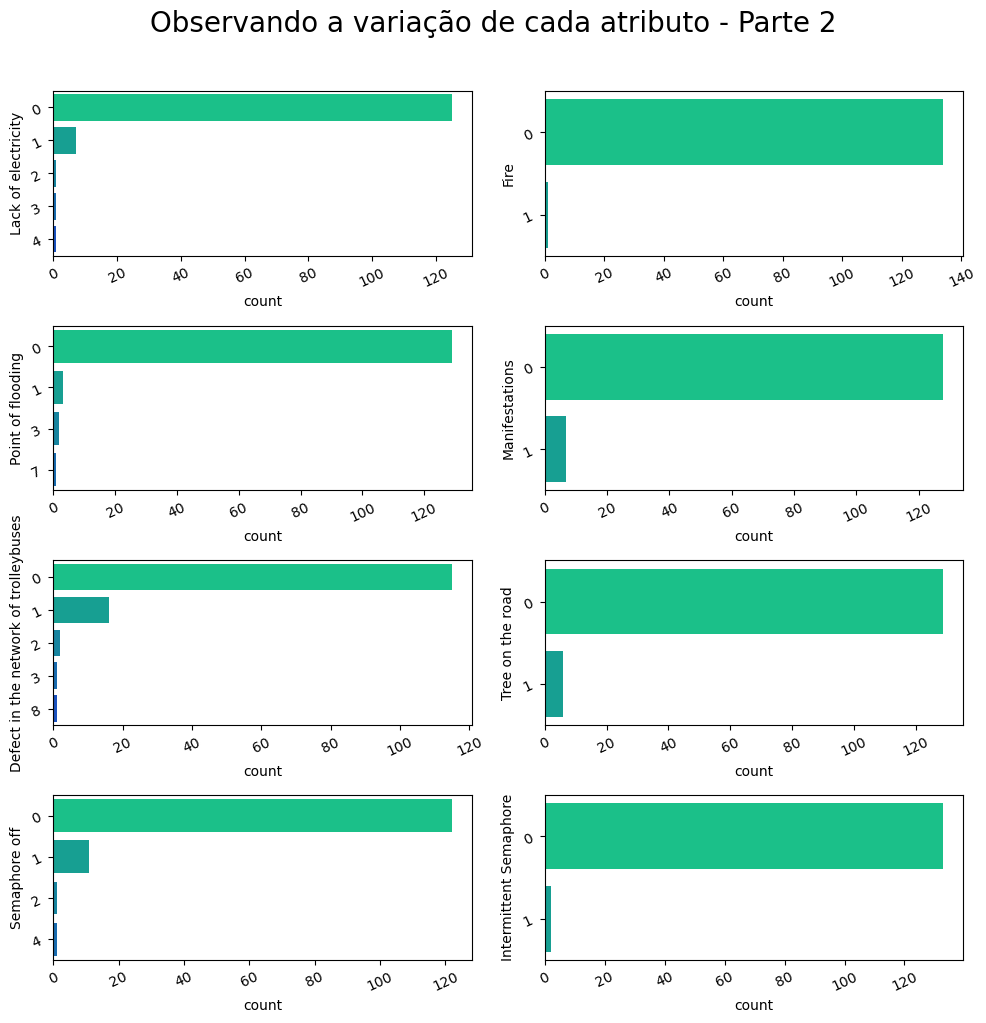

In [16]:
fig,ax =  plt.subplots(4, 2, figsize = (10, 10))
fig.suptitle('Observando a variação de cada atributo - Parte 2',y=1.02, fontsize=20)

ax[0][0].tick_params(labelrotation = 25)
sns.countplot(y = 'Lack of electricity', 
              data = df,
              ax = ax[0][0])
  
ax[0][1].tick_params(labelrotation = 25)
sns.countplot(y = 'Fire', 
              data = df, 
              ax = ax[0][1])

ax[1][0].tick_params(labelrotation = 25)
sns.countplot(y = 'Point of flooding', 
              data = df, 
              ax = ax[1][0])

ax[1][1].tick_params(labelrotation = 25)
sns.countplot(y = 'Manifestations',
              data = df, 
              ax = ax[1][1])

ax[2][0].tick_params(labelrotation = 25)
sns.countplot(y = 'Defect in the network of trolleybuses', 
              data = df, 
              ax = ax[2][0])
  
ax[2][1].tick_params(labelrotation = 25)
sns.countplot(y = 'Tree on the road',
              data = df,
              ax = ax[2][1])
  
ax[3][0].tick_params(labelrotation = 25)
sns.countplot(y = 'Semaphore off',
              data = df,
              ax = ax[3][0])
  
ax[3][1].tick_params(labelrotation = 25)
sns.countplot(y = 'Intermittent Semaphore', 
              data = df, 
              ax = ax[3][1])
  
fig.tight_layout(pad = 1.2)
plt.show()

In [17]:
(df['Intermittent Semaphore'].value_counts() / len(df)) * 100

0    98.518519
1     1.481481
Name: Intermittent Semaphore, dtype: float64

**Lack of electricity**:

A raridade da falta de eletricidade nos registros indica que esse é um evento pouco comum, mas a preparação, a comunicação e a prontidão para lidar com essas situações são importantes para garantir a segurança e a gestão eficaz do tráfego quando ocorrerem. Mesmo que seja raro, é fundamental estar preparado para contingências que envolvam a falta de eletricidade e essa causa pode contribuir para a lentidão do tráfego de veículos em determinadas situações. Isso pode ocorrer devido à desativação de semáforos elétricos, o que pode levar à necessidade de direção mais cuidadosa e à possibilidade de congestionamentos em interseções.

**Fire**:

A ocorrência de incêndios é extremamente rara no contexto deste conjunto de dados, afetando apenas uma pequena porcentagem dos registros.

Embora seja rara, a ocorrência de incêndios pode ter sérias consequências para a segurança pública e a fluidez do tráfego.

Lidar com a ocorrência de incêndios, mesmo que seja rara, requer atenção e preparação. A comunicação rápida e a coordenação das autoridades são essenciais para minimizar o impacto no tráfego e garantir a segurança pública.

**Point of flooding**:

A ocorrência de pontos de inundação é um dos fatores que podem contribuir para a lentidão no tráfego de veículos, e sua presença deve ser levada em consideração ao analisar a lentidão em uma área específica. A gestão adequada de pontos de inundação, incluindo o monitoramento, a sinalização e a drenagem eficiente, é essencial para minimizar o impacto no tráfego e garantir a segurança dos motoristas.

**Manifestations**:

É importante lembrar que o direito à manifestação pacífica é um princípio democrático fundamental. As autoridades devem respeitar e proteger esse direito, ao mesmo tempo em que garantem que as manifestações ocorram de maneira segura e com o menor impacto possível no tráfego.

A gestão de manifestações no tráfego requer um equilíbrio entre o direito à manifestação e a necessidade de garantir a segurança e a fluidez do tráfego. A comunicação eficaz, o monitoramento e a colaboração com as autoridades desempenham um papel fundamental nesse processo.


**Defect in the network of trolleybuses**:

A manutenção preventiva, a intervenção rápida e a comunicação eficaz desempenham um papel fundamental na gestão de ocorrências relacionadas a defeitos na rede de troleibus. Embora essas ocorrências possam afetar o tráfego de veículos, uma resposta coordenada e eficiente pode ajudar a minimizar o impacto e garantir a fluidez do tráfego.

**Tree on the road**:

A queda de árvores na estrada é um evento relativamente raro, mas pode ter sérias consequências para o tráfego de veículos e a segurança. A prevenção, o monitoramento e a resposta rápida são fundamentais para minimizar o impacto dessas ocorrências e garantir a fluidez do tráfego.

**Semaphore off**:

Semáforos desligados podem afetar significativamente o tráfego de veículos e a segurança no trânsito. A manutenção adequada, a resposta rápida a falhas e a comunicação eficaz são essenciais para minimizar o impacto dessas ocorrências e garantir a fluidez do tráfego. A gestão de tráfego adequada também desempenha um papel importante em situações de semáforos desligados.

**Intermittent Semaphore**:

Semáforos intermitentes podem contribuir para a lentidão e a confusão no tráfego de veículos, exigindo uma resposta rápida e eficaz das autoridades de trânsito. A manutenção adequada, a comunicação com o público e a gestão de tráfego desempenham um papel importante na minimização do impacto dessas ocorrências e na garantia da fluidez do tráfego.

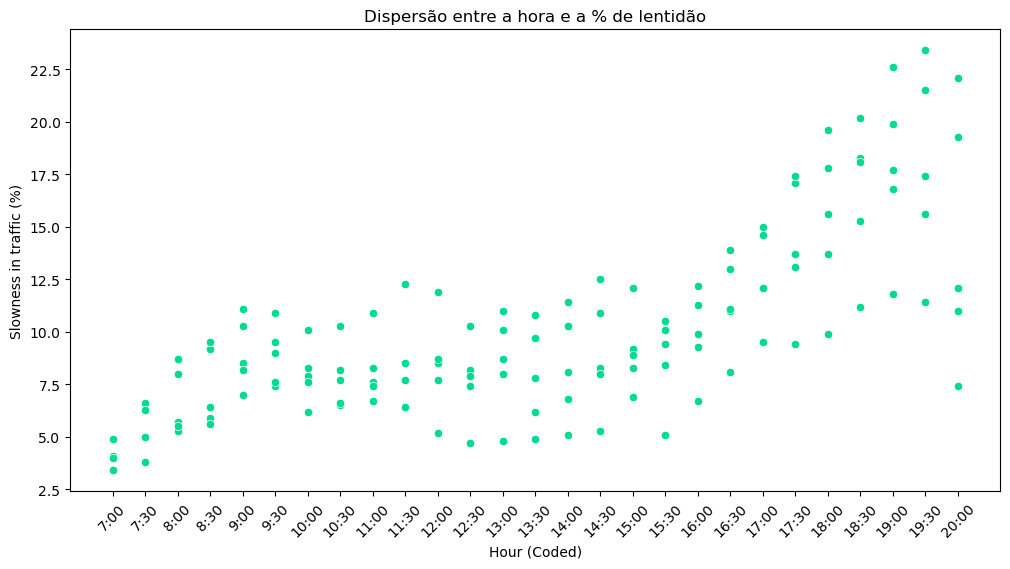

In [18]:
plt.figure(figsize = (12,6))
plt.title("Dispersão entre a hora e a % de lentidão")
plt.xticks(rotation = 45)
ax = sns.scatterplot(x='Hour (Coded)', y='Slowness in traffic (%)',
                data=df)

plt.figure(figsize = (8,8))
plt.xticks(rotation = 45)
sns.lineplot(x = 'Hour (Coded)', y = 'Slowness in traffic (%)', data= df)

### Conclusão:

A observação de que o nível de lentidão no tráfego de veículos aumenta conforme a hora passa, especialmente durante os horários de pico em que as pessoas estão saindo do trabalho e indo para casa, fornece vários insights importantes:

1. **Padrões de Tráfego Diários:** A tendência de aumento da lentidão durante os horários de pico sugere que existem padrões diários de tráfego consistentes na cidade. Isso pode ser resultado de um grande número de pessoas que seguem horários regulares de trabalho e deslocamento.

2. **Necessidade de Gerenciamento de Tráfego:** Os horários de pico são momentos críticos em que o tráfego tende a ser mais congestionado. Isso destaca a necessidade de uma gestão eficaz do tráfego durante esses períodos para evitar congestionamentos, melhorar a fluidez e garantir a segurança nas estradas.

3. **Alternativas de Deslocamento:** Para lidar com a lentidão nos horários de pico, os motoristas podem considerar a utilização de alternativas de deslocamento, como o transporte público, o carpooling ou ajustar seus horários de trabalho para evitar os picos de tráfego.

4. **Investimento em Infraestrutura:** A análise dos horários de pico pode ajudar as autoridades de trânsito a identificar áreas de congestionamento recorrentes e direcionar investimentos em infraestrutura, como a expansão de vias, a melhoria de sistemas de transporte público e a implementação de soluções tecnológicas para gerenciar o tráfego.

5. **Planejamento Urbano:** A compreensão dos padrões de tráfego diários também é fundamental para o planejamento urbano de longo prazo. Isso pode influenciar decisões sobre o desenvolvimento de áreas residenciais e comerciais, a localização de empresas e a criação de vias de tráfego.

6. **Segurança no Trânsito:** Aumentos na lentidão durante os horários de pico podem aumentar o risco de acidentes de trânsito. Portanto, a segurança no trânsito deve ser uma consideração importante durante esses períodos.

Em resumo, a observação dos padrões de lentidão no tráfego ao longo do dia oferece informações valiosas para o planejamento e gerenciamento do tráfego, além de sugerir oportunidades para melhorar a experiência de deslocamento dos cidadãos e a eficiência do sistema de transporte. Esses insights podem contribuir para a otimização do tráfego e para a qualidade de vida na cidade.

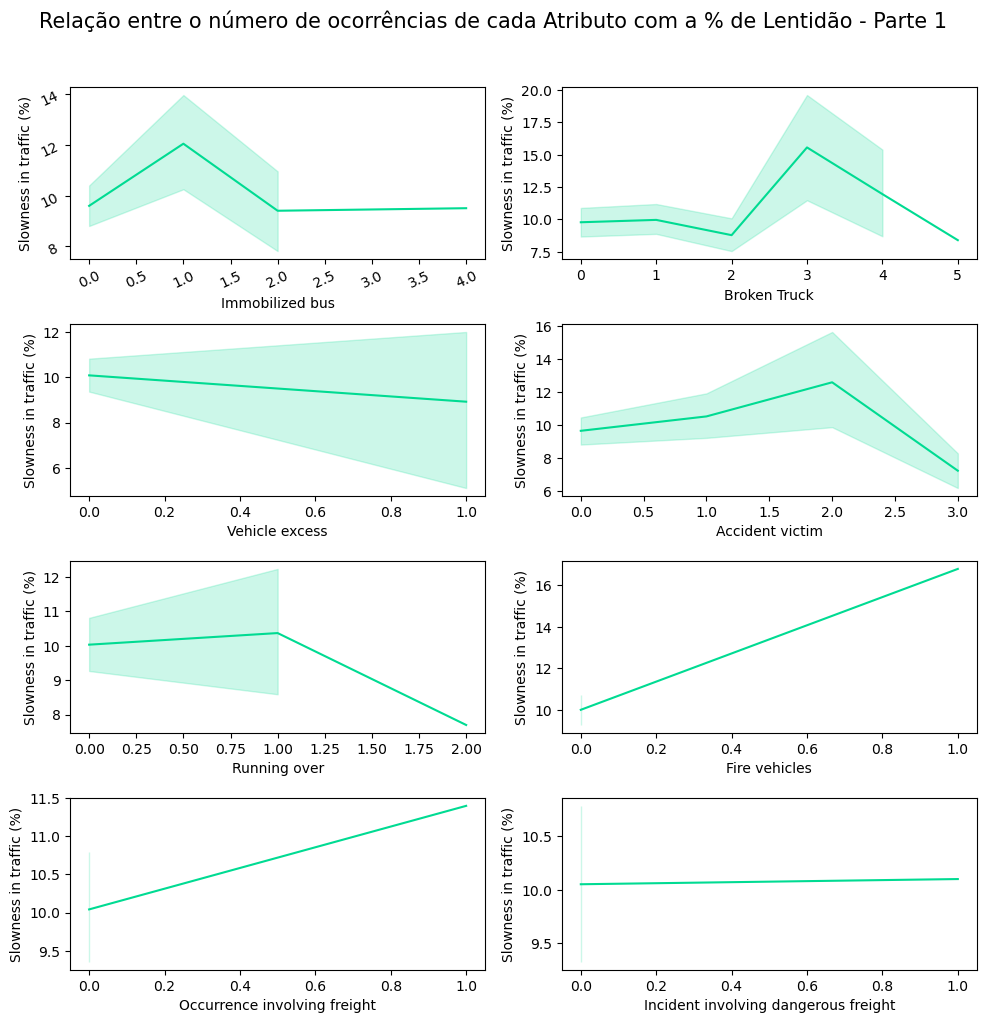

In [19]:
fig,ax =  plt.subplots(4, 2, figsize = (10, 10))
fig.suptitle('Relação entre o número de ocorrências de cada Atributo com a % de Lentidão - Parte 1',y=1.02, fontsize=15)

ax[0][0].tick_params(labelrotation = 25)
sns.lineplot(x = 'Immobilized bus',y = 'Slowness in traffic (%)',
             data = df,ax = ax[0][0])
  

sns.lineplot(x = 'Broken Truck',y = 'Slowness in traffic (%)',
             data = df,ax = ax[0][1])
  

sns.lineplot(x = 'Vehicle excess',y = 'Slowness in traffic (%)',
             data = df,ax = ax[1][0])
  

sns.lineplot(x = 'Accident victim',y = 'Slowness in traffic (%)',
             data = df, ax = ax[1][1])


sns.lineplot(x = 'Running over',y = 'Slowness in traffic (%)',
             data = df, ax = ax[2][0])


sns.lineplot(x = 'Fire vehicles',y = 'Slowness in traffic (%)',
             data = df, ax = ax[2][1])
  
sns.lineplot(x = 'Occurrence involving freight', y = 'Slowness in traffic (%)',
              data = df, ax = ax[3][0])
  

sns.lineplot(x = 'Incident involving dangerous freight', y = 'Slowness in traffic (%)',
              data = df, ax = ax[3][1])

fig.tight_layout(pad = 1.2)

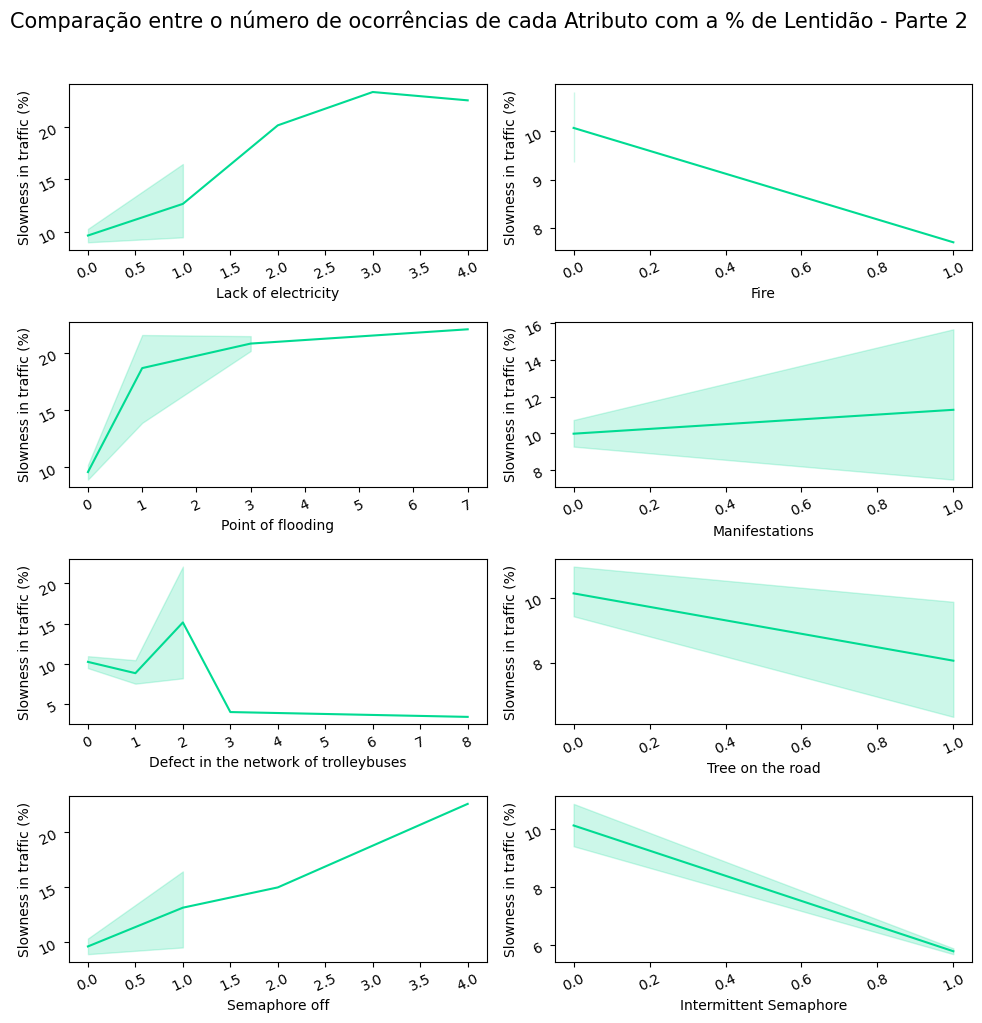

In [20]:
fig,ax =  plt.subplots(4, 2, figsize = (10, 10))
fig.suptitle('Comparação entre o número de ocorrências de cada Atributo com a % de Lentidão - Parte 2',y=1.02, fontsize=15)
 

ax[0][0].tick_params(labelrotation = 25)
sns.lineplot(x= 'Lack of electricity', y = 'Slowness in traffic (%)',
              data = df, ax = ax[0][0])

ax[0][1].tick_params(labelrotation = 25)
sns.lineplot(x= 'Fire', y = 'Slowness in traffic (%)',
              data = df, ax = ax[0][1])

ax[1][0].tick_params(labelrotation = 25)
sns.lineplot(x = 'Point of flooding', y = 'Slowness in traffic (%)',
              data = df, ax = ax[1][0])

ax[1][1].tick_params(labelrotation = 25)
sns.lineplot(x = 'Manifestations', y = 'Slowness in traffic (%)',
              data = df, ax = ax[1][1])

ax[2][0].tick_params(labelrotation = 25)
sns.lineplot(x = 'Defect in the network of trolleybuses', y = 'Slowness in traffic (%)',
              data = df, ax = ax[2][0])
  
ax[2][1].tick_params(labelrotation = 25)
sns.lineplot(x = 'Tree on the road', y = 'Slowness in traffic (%)',
              data = df,ax = ax[2][1])
  
ax[3][0].tick_params(labelrotation = 25)
sns.lineplot(x = 'Semaphore off', y = 'Slowness in traffic (%)',
              data = df, ax = ax[3][0])
  
ax[3][1].tick_params(labelrotation = 25)
sns.lineplot(x = 'Intermittent Semaphore', y = 'Slowness in traffic (%)',
              data = df, ax = ax[3][1])
  
fig.tight_layout(pad = 1.2)

### Insights: 

Aqui está uma descrição de como cada variável do dataset "Behavior of the Urban Traffic of the City of Sao Paulo in Brazil" se relaciona com a variável "Slowness in Traffic (%)" e como cada uma delas pode interferir no tráfego:

1. **Hour (Hora):** A hora do dia pode afetar significativamente o tráfego. Horários de pico, como as horas de entrada e saída do trabalho, geralmente resultam em maior lentidão no tráfego devido ao aumento do volume de veículos nas estradas.

2. **Immobilized Bus (Ônibus Imobilizado):** Quando um ônibus fica imobilizado, ele pode bloquear uma faixa de rodagem, o que leva à redução da velocidade do tráfego nas proximidades. Isso contribui para a lentidão.

3. **Broken Truck (Caminhão Quebrado):** Da mesma forma que um ônibus imobilizado, um caminhão quebrado pode causar bloqueios e atrasos no tráfego.

4. **Vehicle Excess (Excesso de Veículos):** O excesso de veículos nas estradas pode sobrecarregar a capacidade de tráfego, levando a congestionamentos e lentidão.

5. **Accident Victim (Vítima de Acidente):** Acidentes de trânsito frequentemente resultam na interrupção do tráfego para atendimento médico e investigação, contribuindo para a lentidão.

6. **Running Over (Atropelamento):** Atropelamentos também podem resultar na interrupção do tráfego para atendimento médico e investigação, aumentando a lentidão.

7. **Fire Vehicles (Veículos de Incêndio):** A presença de veículos de incêndio pode indicar a ocorrência de um incêndio ou outra situação de emergência, o que geralmente resulta em bloqueios de tráfego e lentidão.

8. **Occurrence Involving Freight (Ocorrência Envolvendo Cargas):** Ocorrências envolvendo cargas, como acidentes de caminhões transportando mercadorias, podem afetar a circulação do tráfego, resultando em lentidão.

9. **Incident Involving Dangerous Freight (Ocorrência Envolvendo Cargas Perigosas):** Incidentes com cargas perigosas podem levar a bloqueios de estradas e evacuações, afetando significativamente o tráfego e causando lentidão.

10. **Lack of Electricity (Falta de Eletricidade):** A falta de eletricidade pode afetar semáforos e sistemas de iluminação de tráfego, causando confusão e lentidão nas estradas.

11. **Fire (Incêndio):** Incêndios podem bloquear estradas e exigir a presença de veículos de emergência, causando lentidão.

12. **Point of Flooding (Ponto de Inundação):** Estradas inundadas são frequentemente intransitáveis, forçando o tráfego a parar e resultando em lentidão.

13. **Manifestations (Manifestações):** Manifestações, protestos ou eventos públicos podem interromper o tráfego e causar lentidão nas vias.

14. **Defect in the Network of Trolleybuses (Defeito na Rede de Troleibus):** Defeitos na rede de troleibus podem levar à interrupção dos serviços de transporte público e afetar o tráfego.

15. **Tree on the Road (Árvore na Estrada):** A presença de árvores na estrada pode bloquear vias, causando interrupções no tráfego e lentidão.

16. **Semaphore Off (Semáforo Desligado):** Semáforos desligados podem levar a problemas de tráfego e lentidão, especialmente em interseções movimentadas.

17. **Intermittent Semaphore (Semáforo Intermitente):** Semáforos intermitentes podem causar confusão no tráfego e resultar em atrasos.

Cada uma dessas variáveis tem o potencial de afetar o tráfego de veículos de maneira significativa, seja causando bloqueios, acidentes, interrupções no transporte público ou problemas de sinalização. A compreensão dessas relações é fundamental para a gestão eficaz do tráfego e para minimizar a lentidão nas estradas.

<AxesSubplot:>

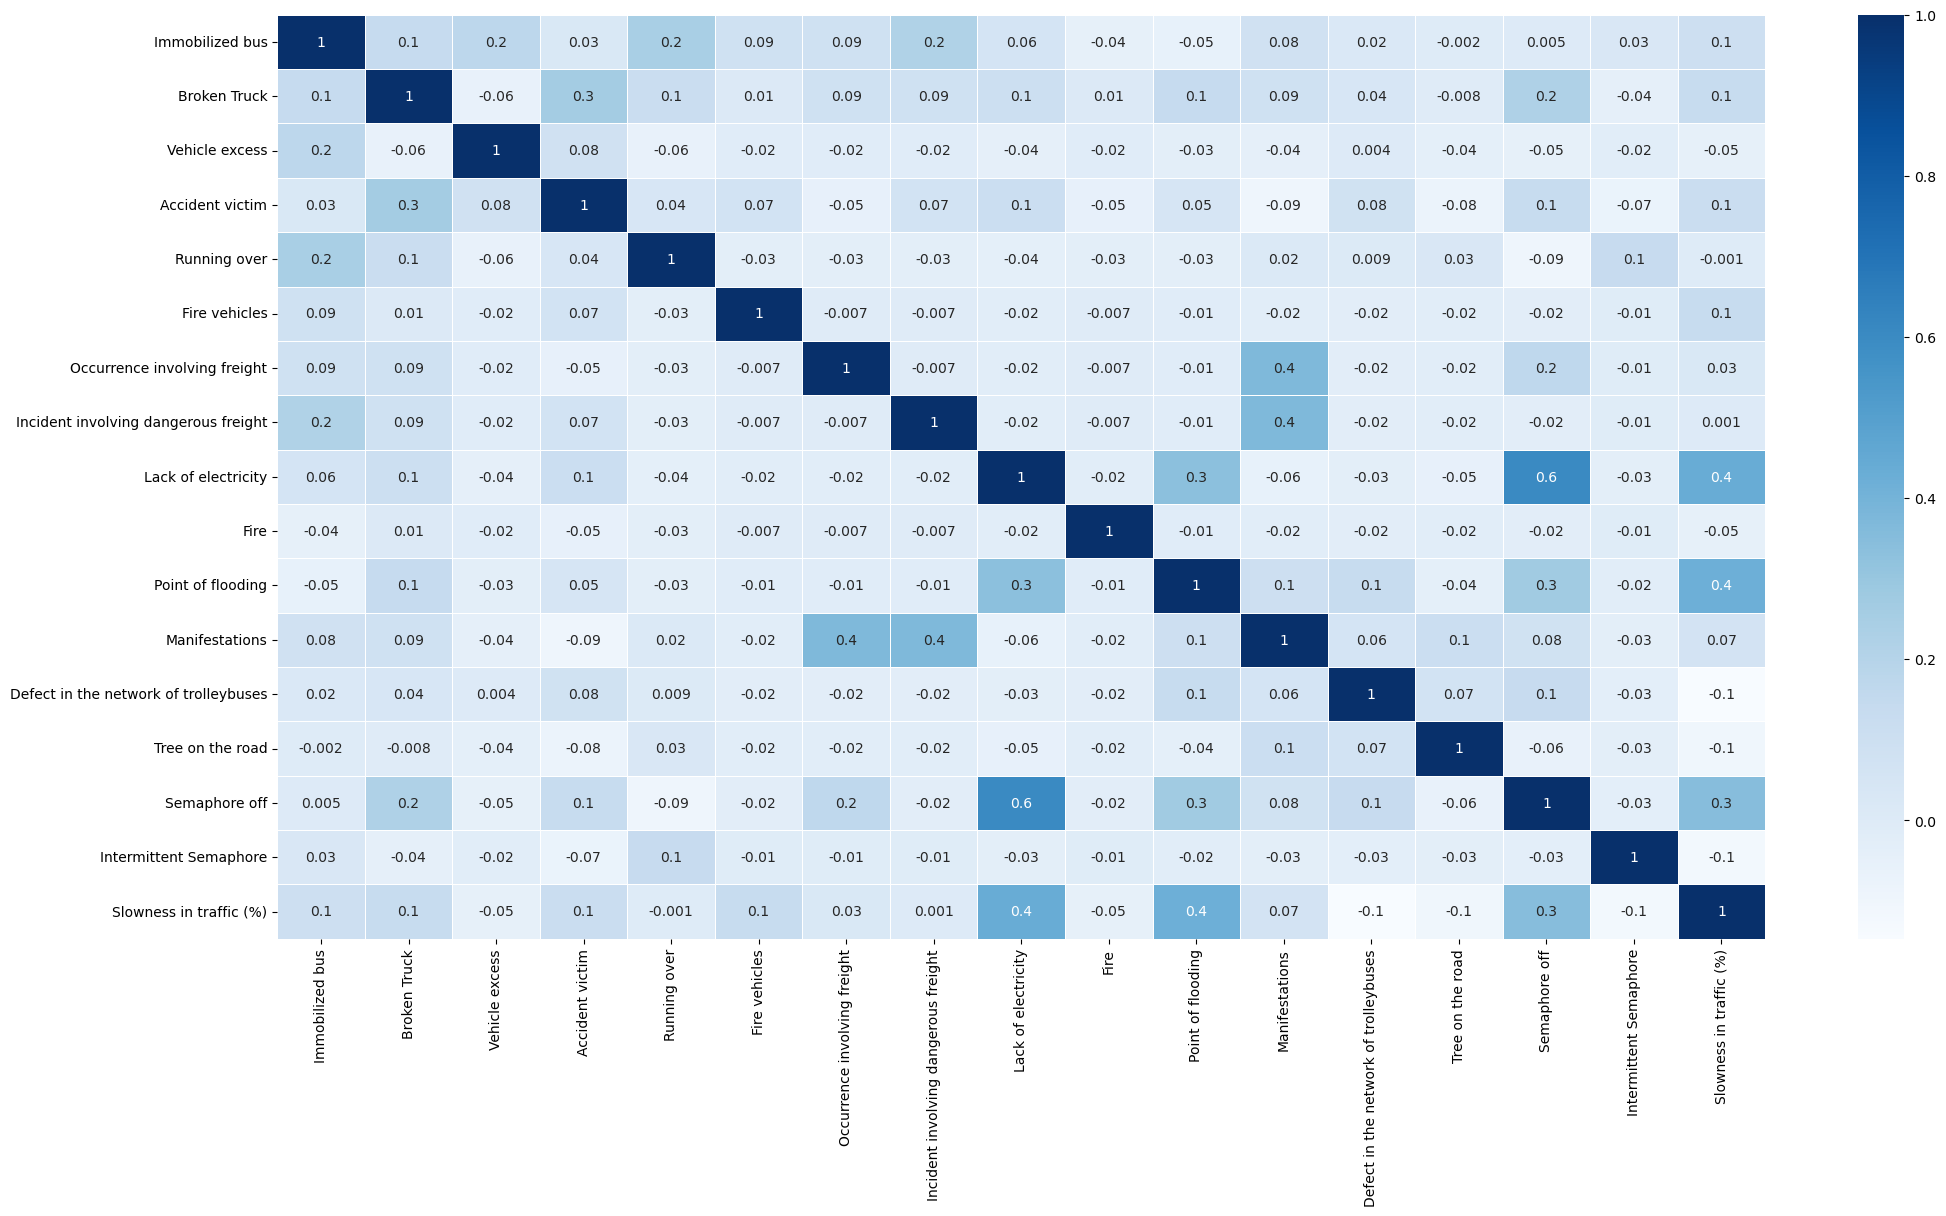

In [21]:
# Matrix de correlaçao para as variaveis numericas 
fig, ax = plt.subplots(figsize = (24,12))
sns.heatmap(df.corr(), annot= True, linewidths=.5, fmt = '.1g', cmap = 'Blues')

### Quebrar os dados em conjunto de treino e conjunto de teste

In [22]:
from sklearn.model_selection import train_test_split 

In [23]:
# Definindo X e Y (nossa variavel alvo)
X = df.drop(['Hour (Coded)', 'Class', 'PeriodoDoDia'], axis= 1)
y = df['Class']

In [24]:
# Dividindo em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30)

In [25]:
print('Tamanho de X_train: ', X_train.shape)
print('Tamanho de X_test: ', X_test.shape)
print('Tamanho de y_train: ', y_train.shape)
print('Tamanho de y_test: ', y_test.shape)

Tamanho de X_train:  (94, 17)
Tamanho de X_test:  (41, 17)
Tamanho de y_train:  (94,)
Tamanho de y_test:  (41,)


### Treinar um estimador do scikit-learn de aprendizagem supervisionada (regressor ou classificador) no conjunto de treino

In [26]:
# Importando os algoritmos
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [27]:
# Instanciando os algoritmos
tree = DecisionTreeClassifier(random_state=1)
svm = LinearSVC(random_state=1)
nb = GaussianNB()
mlp = MLPClassifier(random_state=1)
rfc = RandomForestClassifier(random_state=1)
lrcv = LogisticRegression(random_state=1)

In [28]:
# Treinando os modelos com seus parametros padroes
tree.fit(X_train, y_train)
svm.fit(X_train, y_train)
nb.fit(X_train, y_train)
mlp.fit(X_train, y_train)
rfc.fit(X_train, y_train)
lrcv.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Verificar o desempenho do estimador do scikit-learn no conjunto de teste

In [29]:
# Importando metrica de avaliaçao
from sklearn.metrics import accuracy_score, confusion_matrix

In [30]:
# Arvore de Decisão fazendo previsoes e vendo sua performance
y_pred = tree.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [31]:
# Support Vector Machine fazendo previsoes e vendo sua performance

y_pred = svm.predict(X_test)
accuracy_score(y_test, y_pred)

0.8536585365853658

In [32]:
# Naive Bayes fazendo previsoes e vendo sua performance

y_pred = nb.predict(X_test)
accuracy_score(y_test, y_pred)

0.5365853658536586

In [33]:
# Multiple Layer Perceptron fazendo previsoes e vendo sua performance

y_pred = mlp.predict(X_test)
accuracy_score(y_test, y_pred)

0.8292682926829268

In [34]:
# Random Forest fazendo previsoes e vendo sua performance

y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [35]:
# Regressao Logistica fazendo previsoes e vendo sua performance

y_pred = lrcv.predict(X_test)
accuracy_score(y_test, y_pred)

0.9512195121951219

Nota-se que algoritmos baseados em arvores de decisao, MLP e regressao logistica foram os modelos com melhor performance

Agora vamos fazer um comparativo entre a acuracia entre dados de treino e de teste e sua respectiva confusion matrix

In [36]:
y_train_true = y_train
y_train_pred = tree.predict(X_train)
y_test_true = y_test
y_test_pred = tree.predict(X_test)

print(f"Acurácia em Dados de Treino com Arvore de Decisão: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia em Dados de Teste com Arvore de Decisão: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia em Dados de Treino com Arvore de Decisão: 1.0

 ---------------------------

Acurácia em Dados de Teste com Arvore de Decisão: 1.0


In [37]:
confusion_matrix(y_test_true, y_test_pred)

array([[ 1,  0,  0],
       [ 0, 22,  0],
       [ 0,  0, 18]], dtype=int64)

In [38]:
y_train_true = y_train
y_train_pred = svm.predict(X_train)
y_test_true = y_test
y_test_pred = svm.predict(X_test)

print(f"Acurácia em Dados de Treino com Support Vector Machine: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia em Dados de Teste com Support Vector Machine: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia em Dados de Treino com Support Vector Machine: 0.94

 ---------------------------

Acurácia em Dados de Teste com Support Vector Machine: 0.85


In [39]:
confusion_matrix(y_test_true, y_test_pred)

array([[ 0,  0,  1],
       [ 0, 22,  0],
       [ 0,  5, 13]], dtype=int64)

In [40]:
y_train_true = y_train
y_train_pred = nb.predict(X_train)
y_test_true = y_test
y_test_pred = nb.predict(X_test)

print(f"Acurácia em Dados de Treino com Naive Bayes: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia em Dados de Teste com Naive Bayes: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia em Dados de Treino com Naive Bayes: 0.66

 ---------------------------

Acurácia em Dados de Teste com Naive Bayes: 0.54


In [41]:
confusion_matrix(y_test_true, y_test_pred)

array([[ 1,  0,  0],
       [ 0, 21,  1],
       [ 9,  9,  0]], dtype=int64)

In [42]:
y_train_true = y_train
y_train_pred = mlp.predict(X_train)
y_test_true = y_test
y_test_pred = mlp.predict(X_test)

print(f"Acurácia em Dados de Treino com Multiple Layer Perceptron: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia em Dados de Teste com Multiple Layer Perceptron: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia em Dados de Treino com Multiple Layer Perceptron: 0.93

 ---------------------------

Acurácia em Dados de Teste com Multiple Layer Perceptron: 0.83


In [43]:
confusion_matrix(y_test_true, y_test_pred)

array([[ 0,  0,  1],
       [ 0, 21,  1],
       [ 0,  5, 13]], dtype=int64)

In [44]:
y_train_true = y_train
y_train_pred = rfc.predict(X_train)
y_test_true = y_test
y_test_pred = rfc.predict(X_test)

print(f"Acurácia em Dados de Treino com Random Forest: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia em Dados de Teste com Random Forest: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia em Dados de Treino com Random Forest: 1.0

 ---------------------------

Acurácia em Dados de Teste com Random Forest: 1.0


In [45]:
confusion_matrix(y_test_true, y_test_pred)

array([[ 1,  0,  0],
       [ 0, 22,  0],
       [ 0,  0, 18]], dtype=int64)

In [46]:
y_train_true = y_train
y_train_pred = lrcv.predict(X_train)
y_test_true = y_test
y_test_pred = lrcv.predict(X_test)

print(f"Acurácia em Dados de Treino com Regressão Logistica: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia em Dados de Teste com Regressão Logistica: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia em Dados de Treino com Regressão Logistica: 1.0

 ---------------------------

Acurácia em Dados de Teste com Regressão Logistica: 0.95


In [47]:
confusion_matrix(y_test_true, y_test_pred)

array([[ 1,  0,  0],
       [ 0, 22,  0],
       [ 0,  2, 16]], dtype=int64)

CONCLUSÃO: modelos de ML de aprendizagem probabilisticas não são o ideal para esse problema,
pois vimos o Naive Bayes foi o modelo com pior performance de todos 